In [ ]:
!pip install tensorflow
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install pillow

In [ ]:
import os, sys
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from google.colab.patches import cv2_imshow
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/Dataset/Ka/'
preprocessed_path = '/content/preprocessed/Ka'

Mounted at /content/drive


In [ ]:
!cd drive/MyDrive/Dataset/Ka && ls

Ka  Kaa  Kae  Kah  Kai	Kam  Kau  Ke  Ki  Kii  Ko  Koo	Kru  Ku  Kuu


In [ ]:
letters = []
for folders in os.listdir(dataset_path):
    letters.append(folders + "/")
print(letters)

['Koo/', 'Ke/', 'Kru/', 'Kii/', 'Ko/', 'Ki/', 'Kau/', 'Ku/', 'Kam/', 'Kuu/', 'Kah/', 'Kae/', 'Kai/', 'Kaa/', 'Ka/']


In [ ]:
'''
current_letter = "Ka/"
images_path = dataset_path + current_letter
images = []
for file in os.listdir(images_path):
    image = cv2.imread(os.path.join(images_path, file))
    #cv2_imshow(image)
    #image_name = file
    image_dict = {"image": image, "image_name": file}
    images.append(image_dict)

'''

'\ncurrent_letter = "Ka/"\nimages_path = dataset_path + current_letter\nimages = []\nfor file in os.listdir(images_path):\n    image = cv2.imread(os.path.join(images_path, file))\n    #cv2_imshow(image)\n    #image_name = file\n    image_dict = {"image": image, "image_name": file}\n    images.append(image_dict)\n\n'

# Resizing Images

In [ ]:
def resize(images):
    resized_images = []
    for image in images:
        #print(image.shape)
        new_image = cv2.resize(image.get("image"), (150, 150), interpolation = cv2.INTER_CUBIC)
        #cv2_imshow(new_image)
        image_dict = {"image": new_image, "image_name": image.get('image_name')}
        resized_images.append(image_dict)
    return resized_images

In [ ]:
'''
resized_images = []
for image in images:
    #print(image.shape)
    new_image = cv2.resize(image.get("image"), (150, 150), interpolation = cv2.INTER_CUBIC)
    #cv2_imshow(new_image)
    image_dict = {"image": new_image, "image_name": image.get('image_name')}
    resized_images.append(image_dict)
'''

'\nresized_images = []\nfor image in images:\n    #print(image.shape)\n    new_image = cv2.resize(image.get("image"), (150, 150), interpolation = cv2.INTER_CUBIC)\n    #cv2_imshow(new_image)\n    image_dict = {"image": new_image, "image_name": image.get(\'image_name\')}\n    resized_images.append(image_dict)\n'

# Colour to Grayscale Images

In [ ]:
def col2gray(resized_images):
    grayscaled_images = []
    for image in resized_images:
        #print(image.shape)
        gray_image = cv2.cvtColor(image.get("image"), cv2.COLOR_BGR2GRAY)
        #cv2_imshow(gray_image)
        image_dict = {"image": gray_image, "image_name": image.get('image_name')}
        grayscaled_images.append(image_dict)
        #print(image.get("image").shape, gray_image.shape)
    return grayscaled_images

In [ ]:
'''
grayscaled_images = []
for image in resized_images:
    #print(image.shape)
    gray_image = cv2.cvtColor(image.get("image"), cv2.COLOR_BGR2GRAY)
    #cv2_imshow(gray_image)
    image_dict = {"image": gray_image, "image_name": image.get('image_name')}
    grayscaled_images.append(image_dict)
    #print(image.get("image").shape, gray_image.shape)
'''

'\ngrayscaled_images = []\nfor image in resized_images:\n    #print(image.shape)\n    gray_image = cv2.cvtColor(image.get("image"), cv2.COLOR_BGR2GRAY)\n    #cv2_imshow(gray_image)\n    image_dict = {"image": gray_image, "image_name": image.get(\'image_name\')}\n    grayscaled_images.append(image_dict)\n    #print(image.get("image").shape, gray_image.shape)\n'

In [ ]:
'''
!rm -r gray
!mkdir gray
for image in grayscaled_images:
    cv2.imwrite(os.path.join('gray', image.get("image_name")), image.get("image"))
'''

'\n!rm -r gray\n!mkdir gray\nfor image in grayscaled_images:\n    cv2.imwrite(os.path.join(\'gray\', image.get("image_name")), image.get("image"))\n'

# Grayscale to Monochrome Images

In [ ]:
def gray2mono(grayscaled_images):
    monochrome_images = []
    for image in grayscaled_images:
        #print(image.shape)
        (thresh, monochrome_image) = cv2.threshold(image.get("image"), 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        #cv2_imshow(monochrome_image)
        image_dict = {"image": monochrome_image, "image_name": image.get('image_name')}
        monochrome_images.append(image_dict)
        #print(image.get("image").shape, monochrome_image.shape)
    return monochrome_images

In [ ]:
'''
monochrome_images = []
for image in grayscaled_images:
    #print(image.shape)
    (thresh, monochrome_image) = cv2.threshold(image.get("image"), 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    #cv2_imshow(monochrome_image)
    image_dict = {"image": monochrome_image, "image_name": image.get('image_name')}
    monochrome_images.append(image_dict)
    #print(image.get("image").shape, monochrome_image.shape)
'''

'\nmonochrome_images = []\nfor image in grayscaled_images:\n    #print(image.shape)\n    (thresh, monochrome_image) = cv2.threshold(image.get("image"), 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)\n    #cv2_imshow(monochrome_image)\n    image_dict = {"image": monochrome_image, "image_name": image.get(\'image_name\')}\n    monochrome_images.append(image_dict)\n    #print(image.get("image").shape, monochrome_image.shape)\n'

In [ ]:
'''
!rm -r mono
!mkdir mono
for image in monochrome_images:
    cv2.imwrite(os.path.join('mono/', image.get("image_name")), image.get("image"))
'''

'\n!rm -r mono\n!mkdir mono\nfor image in monochrome_images:\n    cv2.imwrite(os.path.join(\'mono/\', image.get("image_name")), image.get("image"))\n'

# Morphological Operations (Erosion and Dilution)

In [ ]:
def erode(image, kernel):
    return cv2.dilate(image, kernel, iterations=1) #reversed because image is negative

def dilate(image, kernel):
    return cv2.erode(image, kernel, iterations=1) #reversed because image is negative

def erodil(image, kernel1, kernel2):
    return dilate(erode(image, kernel1), kernel2)

def dilero(image, kernel1, kernel2):
    return erode(dilate(image, kernel1), kernel2)

In [ ]:
def morph(monochrome_images):
    kernel1 = np.ones((5, 5), np.uint8)
    kernel2 = np.ones((5, 5), np.uint8)

    morphologised_images = []
    for image in monochrome_images:
        #print(image.shape)
        erodiled = erodil(image.get("image"), kernel1, kernel2)
        dileroed = dilero(image.get("image"), kernel1, kernel2)
        #cv2_imshow(erodiled)
        #cv2_imshow(dileroed)
        image_dict = {"image": dileroed, "image_name": image.get('image_name')} #Chose dileroed because it looks better
        morphologised_images.append(image_dict)
        #print(image.get("image").shape, morphologised_images.shape)
    return morphologised_images

Original Image:


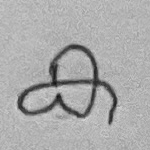

Erosion and Dilation:


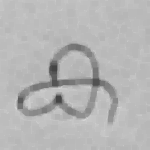

Dilation and Erosion:


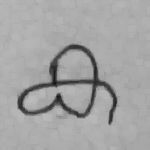

In [ ]:
kernel = np.ones((5, 5), np.uint8)
img = cv2.imread('/content/drive/MyDrive/Dataset/Ka/Ka/Ka_23.png', cv2.IMREAD_GRAYSCALE)

eroded_and_dilated = erodil(img, kernel, kernel)
dilated_and_eroded = dilero(img, kernel, kernel)

print('Original Image:')
cv2_imshow(img)

print('Erosion and Dilation:')
cv2_imshow(eroded_and_dilated)

print('Dilation and Erosion:')
cv2_imshow(dilated_and_eroded)

In [ ]:
'''
kernel1 = np.ones((5, 5), np.uint8)
kernel2 = np.ones((5, 5), np.uint8)

morphologised_images = []
for image in monochrome_images:
    #print(image.shape)
    erodiled = erodil(image.get("image"), kernel1, kernel2)
    dileroed = dilero(image.get("image"), kernel1, kernel2)
    #cv2_imshow(erodiled)
    #cv2_imshow(dileroed)
    image_dict = {"image": dileroed, "image_name": image.get('image_name')} #Chose dileroed because it looks better
    morphologised_images.append(image_dict)
    #print(image.get("image").shape, morphologised_images.shape)
'''

'\nkernel1 = np.ones((5, 5), np.uint8)\nkernel2 = np.ones((5, 5), np.uint8)\n\nmorphologised_images = []\nfor image in monochrome_images:\n    #print(image.shape)\n    erodiled = erodil(image.get("image"), kernel1, kernel2)\n    dileroed = dilero(image.get("image"), kernel1, kernel2)\n    #cv2_imshow(erodiled)\n    #cv2_imshow(dileroed)\n    image_dict = {"image": dileroed, "image_name": image.get(\'image_name\')} #Chose dileroed because it looks better\n    morphologised_images.append(image_dict)\n    #print(image.get("image").shape, morphologised_images.shape)\n'

In [ ]:
'''
!rm -r morph
!mkdir morph
for image in monochrome_images:
    cv2.imwrite(os.path.join('morph/', image.get("image_name")), image.get("image"))
'''

'\n!rm -r morph\n!mkdir morph\nfor image in monochrome_images:\n    cv2.imwrite(os.path.join(\'morph/\', image.get("image_name")), image.get("image"))\n'

In [ ]:
'''
print(letters)
'''

'\nprint(letters)\n'

# Run all preprocessing steps together

In [ ]:
images_path

'/content/preprocessed/Ka/Ka/'

In [ ]:
!rm -r preprocessed
!mkdir -p preprocessed/Ka
for current_letter in letters:
    images_path = dataset_path + current_letter
    images = []

    for file in os.listdir(images_path):
        image = cv2.imread(os.path.join(images_path, file))
        #cv2_imshow(image)
        #image_name = file
        image_dict = {"image": image, "image_name": file}
        images.append(image_dict)

    #resize
    #resized = resize(images)

    #grayscale
    gray = col2gray(images)

    #monochrome
    #mono
    morphed = gray2mono(gray)

    #morpholgical operations
    #morphed = morph(mono)

    current_letter_path = os.path.join(preprocessed_path, current_letter)
    os.mkdir(current_letter_path)
    for image in morphed:
        cv2.imwrite(os.path.join(current_letter_path, image.get("image_name")), image.get("image"))

In [ ]:
!rm -r preprocessed
!mkdir -p preprocessed/Ka

for current_letter in letters:
    images_path = dataset_path + current_letter
    images = []

    for file in os.listdir(images_path):
        image = cv2.imread(os.path.join(images_path, file))
        #cv2_imshow(image)
        #image_name = file
        image_dict = {"image": image, "image_name": file}
        images.append(image_dict)

    #resize
    resized = resize(images)

    #grayscale
    gray = col2gray(resized)

    #monochrome
    mono = gray2mono(gray)

    #morpholgical operations
    morphed = morph(mono)

    current_letter_path = os.path.join(preprocessed_path, current_letter)
    os.mkdir(current_letter_path)
    for image in morphed:
        cv2.imwrite(os.path.join(current_letter_path, image.get("image_name")), image.get("image"))

rm: cannot remove 'preprocessed': No such file or directory


# **CNN**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from collections import deque

In [ ]:
class_names = ['Ka', 'Kaa', 'Ki', 'Kii', 'Ku', 'Kuu', 'Kru', 'Ke', 'Kae', 'Kai', 'Ko', 'Koo', 'Kau', 'Kam', 'Kah']
class_labels = list(range(15))

label_dict = {}
tuples = [(key, value) for i, (key, value) in enumerate(zip(class_names, class_labels))]
label_dict = dict(tuples)
#label_dict

# Train images

In [ ]:
'''
file = 'Ka_1.png'
image = cv2.imread('/content/preprocessed/Ka/Ka/Ka_1.png', cv2.IMREAD_GRAYSCALE)
data = np.asarray(image)

train_images = np.array([data, data])
train_images.shape
'''

"\nfile = 'Ka_1.png'\nimage = cv2.imread('/content/preprocessed/Ka/Ka/Ka_1.png', cv2.IMREAD_GRAYSCALE)\ndata = np.asarray(image)\n\ntrain_images = np.array([data, data])\ntrain_images.shape\n"

# Loading Dataset

In [ ]:
temp_train_images = deque()
temp_train_labels = deque()

temp_test_images = deque()
temp_test_labels = deque()

counter = 0
test_set_size_reciprocal = 10

for current_letter in letters:
    images_path = os.path.join(preprocessed_path, current_letter)

    for file in os.listdir(images_path):
        counter += 1

        image_path = os.path.join(images_path, file)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        #cv2_imshow(image)

        data = np.asarray(image)
        parent_path = os.path.dirname(image_path)
        base_name = os.path.basename(parent_path)
        label = label_dict.get(base_name)

        if counter % test_set_size_reciprocal == 0:
            temp_test_images.append(data)
            temp_test_labels.append(label)

        else:
            temp_train_images.append(data)
            temp_train_labels.append(label)

train_images = np.array(temp_train_images)
train_labels = np.array(temp_train_labels)

test_images = np.array(temp_train_images)
test_labels = np.array(temp_train_labels)
# train_images = tf.convert_to_tensor(np.array(temp_images), dtype = tf.uint8)
# train_labels = tf.convert_to_tensor(np.array(temp_labels), dtype = tf.uint8)

# Creating Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#print(model.summary())

In [ ]:
history = model.fit(train_images, train_labels, epochs=7)

Epoch 1/7
10/10 [==============================] - 12s 51ms/step - loss: 5594.5967 - accuracy: 0.0948
Epoch 2/7
10/10 [==============================] - 0s 27ms/step - loss: 584.8300 - accuracy: 0.2092
Epoch 3/7
10/10 [==============================] - 0s 25ms/step - loss: 179.3660 - accuracy: 0.3170
Epoch 4/7
10/10 [==============================] - 0s 23ms/step - loss: 63.3518 - accuracy: 0.4739
Epoch 5/7
10/10 [==============================] - 0s 27ms/step - loss: 33.2246 - accuracy: 0.4183
Epoch 6/7
10/10 [==============================] - 0s 24ms/step - loss: 14.1850 - accuracy: 0.5131
Epoch 7/7
10/10 [==============================] - 0s 24ms/step - loss: 6.2646 - accuracy: 0.6242


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10/10 - 0s - loss: 4.5942 - accuracy: 0.7157 - 218ms/epoch - 22ms/step

Test accuracy: 0.7156862616539001


# **ResNet**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def identity_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [ ]:
def convolutional_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Processing Residue with conv(1,1)
    x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [ ]:
def ResNet34(shape = (32, 32, 3), classes = 10):
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [3, 4, 6, 3]
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = identity_block(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convolutional_block(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = identity_block(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
    return model

In [ ]:
model = ResNet34(shape = (150, 150, 1), classes = 15)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#print(model.summary())

In [ ]:
history = model.fit(train_images, train_labels, epochs=25, verbose=2)

Epoch 1/25
10/10 - 25s - loss: 16.6121 - accuracy: 0.2549 - 25s/epoch - 2s/step
Epoch 2/25
10/10 - 1s - loss: 2.7950 - accuracy: 0.2908 - 1s/epoch - 100ms/step
Epoch 3/25
10/10 - 1s - loss: 1.9673 - accuracy: 0.4118 - 1s/epoch - 100ms/step
Epoch 4/25
10/10 - 1s - loss: 1.8565 - accuracy: 0.4150 - 996ms/epoch - 100ms/step
Epoch 5/25
10/10 - 1s - loss: 1.8071 - accuracy: 0.4150 - 996ms/epoch - 100ms/step
Epoch 6/25
10/10 - 1s - loss: 1.6801 - accuracy: 0.4248 - 972ms/epoch - 97ms/step
Epoch 7/25
10/10 - 1s - loss: 1.6221 - accuracy: 0.5196 - 974ms/epoch - 97ms/step
Epoch 8/25
10/10 - 1s - loss: 1.4451 - accuracy: 0.5686 - 976ms/epoch - 98ms/step
Epoch 9/25
10/10 - 1s - loss: 1.1927 - accuracy: 0.6176 - 981ms/epoch - 98ms/step
Epoch 10/25
10/10 - 1s - loss: 0.9826 - accuracy: 0.6699 - 976ms/epoch - 98ms/step
Epoch 11/25
10/10 - 1s - loss: 0.7364 - accuracy: 0.7386 - 979ms/epoch - 98ms/step
Epoch 12/25
10/10 - 1s - loss: 0.6167 - accuracy: 0.7810 - 980ms/epoch - 98ms/step
Epoch 13/25
10/10

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10/10 - 1s - loss: 19.4215 - accuracy: 0.5752 - 1s/epoch - 103ms/step

Test accuracy: 0.5751634240150452


```
SIZE=10      SIZE=7
----------------------
epoch=25     epoch=25
acc=0.46     acc=0.58
----------------------
epoch=50     epoch=50
acc=0.71     acc=0.54
----------------------
epoch=75     epoch=75
acc=0.995    acc=0.29
----------------------
epoch=100    epoch=100
acc=1.0      acc=0.898
```

# **FUTURE WORK**

# LSTM RNN Model